<a href="https://colab.research.google.com/github/woodstone10/fundamental-ml-dl-study/blob/main/linear_and_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression 

   : What if your data is actually more complex than a simple straight line? Surprisingly,
   you can actually use a linear model to fit nonlinear data. A simple way to do this is to
   add powers of each feature as new features, then train a linear model on this extended
   set of features. This technique is called Polynomial Regression.
   Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
   nomialFeatures class to transform our training data, adding the square (2nd-degree
   polynomial) of each feature in the training set as new features (in this case there is
   just one feature):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Data

---

sample data from Book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd Edition)"


In [ ]:
m = 100
# Linear Regression
# X = 2 * np.random.rand(m, 1)
# y = 4 + 3 * X + np.random.randn(m, 1)
# Polynomial Regression
noise = 1
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)*noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Prediction with Linear Regression

In [ ]:
linear_train_errors, linear_test_errors = [], []
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
for m in range(1, len(X_train)+1):
    model.fit(X_train[:m], y_train[:m])
    y_train_pred_LinearReg = model.predict(X_train[:m])
    y_test_pred_LinearReg = model.predict(X_test)
    linear_train_errors.append(mean_squared_error(y_train[:m], y_train_pred_LinearReg))
    linear_test_errors.append(mean_squared_error(y_test, y_test_pred_LinearReg))
print("Linear Regression Coefficients",model.intercept_, model.coef_)

Linear Regression Coefficients [3.14550369] [[0.86820884]]


## Prediction with Polynomial Regression

In [ ]:
poly_train_errors, poly_test_errors = [], []
w = 2 # Degree
# a simple way to regularize a polynomial model
# is to reduce the number of polynomial degrees.
poly_features = sklearn.preprocessing.PolynomialFeatures(degree=w, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
#   X_poly now contains the original feature of X plus the square of this feature. Now you
#   can fit a LinearRegression model to this extended training data
model = sklearn.linear_model.LinearRegression()
for m in range(1, len(X_train_poly)+1):
    model.fit(X_train_poly[:m], y_train[:m])
    y_train_pred_PolyReg = model.predict(X_train_poly[:m])
    y_test_pred_PolyReg = model.predict(X_test_poly)
    poly_train_errors.append(mean_squared_error(y_train[:m], y_train_pred_PolyReg))
    poly_test_errors.append(mean_squared_error(y_test, y_test_pred_PolyReg))
print("Polynomial Regression Coefficients:",model.intercept_, model.coef_)
# the model estimates y = 0.56x1^2 + 0.93x1 + 1.78 when in fact the original
# y = model.coef_[1]x1^2 + model.coef_1[0]x1 + model.intercept_
# function was y = 0.5x1^2 + 1.0x1 + 2.0 + Gaussian noise
# y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Polynomial Regression Coefficients: [1.67705407] [[0.90865462 0.52037256]]


Performance RMSE (Root Mean Square Error)
 When the model is
 trained on very few training instances, it is incapable of generalizing properly, which
 is why the validation error is initially quite big. Then as the model is shown more
 training examples, it learns and thus the validation error slowly goes down. However,
 once again a straight line cannot do a good job modeling the data, so the error ends
 up at a plateau, very close to the other curve.
 These learning curves are typical of an underfitting model. Both curves have reached
 a plateau; they are close and fairly high.

 These learning curves look a bit like the previous ones, but there are two very impor‐
 tant differences:

 • The error on the training data is much lower than with the Linear Regression
 model.
 
 • There is a gap between the curves. This means that the model performs signifi‐
 cantly better on the training data than on the validation data, which is the hall‐
 mark of an overfitting model. However, if you used a much larger training set,
 the two curves would continue to get closer.

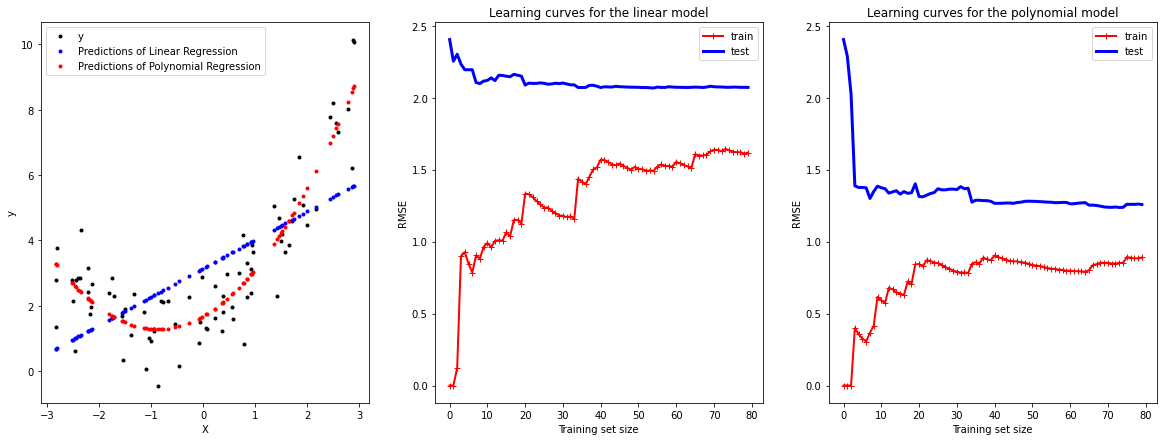

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.plot(X_train,y_train,"k.",label='y')
plt.plot(X_train,y_train_pred_LinearReg,"b.",label='Predictions of Linear Regression')
plt.plot(X_train,y_train_pred_PolyReg,"r.",label='Predictions of Polynomial Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1,3,2)
plt.plot(np.sqrt(linear_train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(linear_test_errors), "b-", linewidth=3, label="test")
plt.title("Learning curves for the linear model")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()

plt.subplot(1,3,3)
plt.plot(np.sqrt(poly_train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(poly_test_errors), "b-", linewidth=3, label="test")
plt.title("Learning curves for the polynomial model")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()